In this Colab, we explore some of the fundamental features of TensorFlow Probability. This is adpated from the TFP examples pages:

https://github.com/tensorflow/probability/

https://blog.tensorflow.org/2019/03/regression-with-probabilistic-layers-in.html

https://github.com/tensorflow/probability/blob/a9c6499dc5321967efc4a52a832fb3334d9c03eb/tensorflow_probability/examples/jupyter_notebooks/Gaussian_Process_Regression_In_TFP.ipynb

### Dependencies & Prerequisites


In [3]:
#@title Install { display-mode: "form" }
TF_Installation = 'TF2 Stable 2.3.0 (CPU)' #@param ['TF2 Nightly (GPU)', 'TF2 Stable  2.3.0 (GPU)', 'TF2 Nightly (CPU)', 'TF2 Stable  2.3.0 (CPU)', 'System']

if TF_Installation == 'TF2 Nightly (GPU)':
  !pip3 install -q --upgrade tf-nightly-gpu
  print('Installation of',TF_Installation,'complete.')
  
elif TF_Installation == 'TF2 Stable 2.3.0 (GPU)':
  !pip3 install -q --upgrade tensorflow-gpu==2.3.0
  print('Installation of',TF_Installation,'complete.')
  
elif TF_Installation == 'TF2 Nightly (CPU)':
  !pip3 install -q --upgrade tf-nightly-cpu
  print('Installation of',TF_Installation,'complete.')
  
elif TF_Installation == 'TF2 Stable 2.3.0 (CPU)':
  !pip3 install -q --upgrade tensorflow-cpu==2.3.0
  print('Installation of',TF_Installation,'complete.')
  
elif TF_Installation == 'System':
  pass
else:
  raise ValueError('Selection Error: Please select a valid '
                   'installation option.')

You should consider upgrading via the 'pip install --upgrade pip' command.
Installation of TF2 Stable 2.3.0 (CPU) complete.


In [5]:
#@title Install { display-mode: "form" }
TFP_Installation = "Stable" #@param ["Nightly", "Stable", "System"]

if TFP_Installation == "Nightly":
  !pip3 install -q tfp-nightly
  print('Installation of',TFP_Installation,'complete.')
  
elif TFP_Installation == "Stable":
  !pip3 install -q --upgrade tensorflow-probability
  print('Installation of',TFP_Installation,'complete.')
  
elif TFP_Installation == "System":
  pass
else:
  raise ValueError("Selection Error: Please select a valid "
                   "installation option.")


!pip install -q seaborn

Installation of Stable complete.


In [6]:
#@title Import { display-mode: "form" }

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.python import tf2
if not tf2.enabled():
  import tensorflow.compat.v2 as tf
  tf.enable_v2_behavior()
  assert tf2.enabled()

import tensorflow_probability as tfp
print('tensorflow version: ',tf.__version__)
print('tensorflow probability version: ',tfp.__version__)
print('seaborn version: ',sns.__version__)

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions

tensorflow version:  2.3.0
tensorflow probability version:  0.11.0
seaborn version:  0.11.0


In [7]:
#@title Utils { display-mode: "form" }
def print_subclasses_from_module(module, base_class, maxwidth=80):
  import functools, inspect, sys
  subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
  def red(acc, x):
    if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
      acc.append(x)
    else:
      acc[-1] += ", " + x
    return acc
  print('\n'.join(functools.reduce(red, subclasses, [])))

In [9]:
# Code can run seamlessly on a GPU, just change Colab runtime type
# in the 'Runtime' menu.
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("Using GPU device",tf.test.gpu_device_name())
else:
  print("Using a CPU")

Using a CPU


## TensorFlow Probability

*TensorFlow Probability is a library for probabilistic reasoning and statistical analysis in TensorFlow.*

At the lowest level it allows us to create and sample from different probability distributions.

At a higher level we can construct probabilistic layers in our network and use different optimizers, MCMC and Variational Inference techniques.



## Distributions
A `tfp.distributions.Distribution` is a class with two core methods: `sample` and `log_prob`.

TFP has a lot of distributions!


In [10]:
print_subclasses_from_module(tfp.distributions, tfp.distributions.Distribution)

Autoregressive, BatchReshape, Bates, Bernoulli, Beta, BetaBinomial, Binomial
Blockwise, Categorical, Cauchy, Chi, Chi2, CholeskyLKJ, ContinuousBernoulli
Deterministic, Dirichlet, DirichletMultinomial, Distribution, DoublesidedMaxwell
Empirical, ExpRelaxedOneHotCategorical, Exponential, FiniteDiscrete, Gamma
GammaGamma, GaussianProcess, GaussianProcessRegressionModel, GeneralizedNormal
GeneralizedPareto, Geometric, Gumbel, HalfCauchy, HalfNormal, HalfStudentT
HiddenMarkovModel, Horseshoe, Independent, InverseGamma, InverseGaussian
JohnsonSU, JointDistribution, JointDistributionCoroutine
JointDistributionCoroutineAutoBatched, JointDistributionNamed
JointDistributionNamedAutoBatched, JointDistributionSequential
JointDistributionSequentialAutoBatched, Kumaraswamy, LKJ, Laplace
LinearGaussianStateSpaceModel, LogLogistic, LogNormal, Logistic, LogitNormal
Mixture, MixtureSameFamily, Moyal, Multinomial, MultivariateNormalDiag
MultivariateNormalDiagPlusLowRank, MultivariateNormalFullCovariance


### A simple scalar-variate `Distribution`

In [11]:
# A standard normal
#pdf(x; mu, sigma) = exp(-0.5 (x - mu)**2 / sigma**2) / Z
#Z = (2 pi sigma**2)**0.5

# Define a single scalar Normal distribution, centered at 0 with standard deviation equal to 3.
dist = tfd.Normal(loc=0., scale=3.)
print(dist)



tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


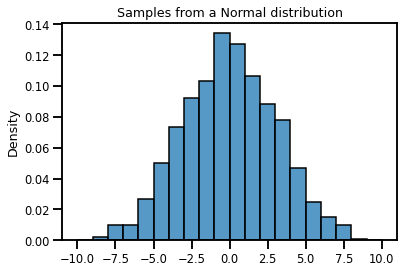

In [21]:
# Get 1000 random samples from the distribution
samples = dist.sample(1000)
# plot these samples in a histogram and normalize based on area under the curve ('density')
sns.histplot(samples,bins=20,binrange=[-10,10],stat='density')
plt.title("Samples from a Normal distribution")
plt.show()

In [43]:
# Compute the log_prob of a single point in distribution
print('log_prob at 0:            ',np.exp(dist.log_prob(0.)))

# Compute the log_prob of a few points
print('log_prob on three points: ',np.exp(dist.log_prob([-1., 0., 1.])))

# Evaluate the continuous distribution function (CDF) at 1, returning a scalar.
print('cdf at 1:                 ',dist.cdf(1.))

log_prob at 0:             0.13298075
log_prob on three points:  [0.1257944  0.13298075 0.1257944 ]
cdf at 1:                  tf.Tensor(0.63055867, shape=(), dtype=float32)


### Distributions and Shapes

Like Numpy `ndarrays`, TensorFlow `Tensors` have *shapes*.

TensorFlow Probability `Distributions` have *shape semantics* 

  * **Batch shape** denotes a *collection* of `Distribution`s with distinct parameters
  * **Event shape** denotes the shape of *samples* from the `Distribution`.


In [44]:
# Create a batch of 3 normals with three different centers but the same width
normals = tfd.Normal([-2.5, 0., 2.5], 1.)  # The scale parameter broadcasts!
# there are 3 normal distributions in this batch
print("Batch shape:", normals.batch_shape)
# these normal distributions are univariant, meaning they are 1 demensional distributions
print("Event shape:", normals.event_shape)

Batch shape: (3,)
Event shape: ()


In [45]:
# sample 1000 points from each of the distributions in this batch
samples = normals.sample(1000)
print("Shape of samples:", samples.shape)

Shape of samples: (1000, 3)


In [27]:
# A batch of normals gives a batch of log_probs. Three inputs, one for each distribution,
# which gives one log_prob for each distribution at that location.
# since we pass in the center position of each distribution, we get the same result
print(np.exp(normals.log_prob([-2.5, 0., 2.5])))

[0.3989423 0.3989423 0.3989423]


In [28]:
# The computation broadcasts, so a batch of normals applied to a scalar
# also gives a result for each distribution.
print(np.exp(normals.log_prob(0.)))

[0.0175283 0.3989423 0.0175283]


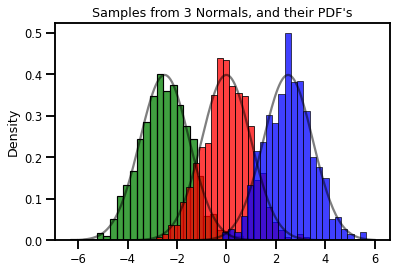

In [31]:
# Summarizing visually
xs = np.linspace(-6, 6, 200)[..., np.newaxis]
for i in range(3):
  sns.histplot(samples[:, i], kde=False,color=['green','red','blue'][i],stat='density')
plt.plot(np.tile(xs, 3), normals.prob(xs), c='k', alpha=.5)
plt.title("Samples from 3 Normals, and their PDF's")
plt.show()

# Multivariate Distributions

We'll create a multivariate normal with a diagonal covariance:

In [46]:
# create a multivariate Normal distribution, meaning a 2D distribution
mvn = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag = [1., 4.])
print("Batch shape:", mvn.batch_shape)
print("Event shape:", mvn.event_shape)

Batch shape: ()
Event shape: (2,)


In [47]:
# get 10 random samples of this 2D distribution 
samples = mvn.sample(10)
print("Samples shape:", samples.shape)
# you can see the first entry in each point is from the loc=0,scale=1 distribution, while
# the second is from the loc=10,scale=4 distribution.
print("samples:",samples)

Samples shape: (10, 2)
samples: tf.Tensor(
[[ 0.8032244   8.242373  ]
 [-1.2182288  12.935353  ]
 [-0.5409057   7.532791  ]
 [-0.79381984 13.570711  ]
 [ 0.6910443  13.80222   ]
 [ 0.24613331 10.463173  ]
 [ 1.0670297   6.8998494 ]
 [ 0.3852359  14.293373  ]
 [-0.21626808 11.462062  ]
 [ 1.1156225   7.775814  ]], shape=(10, 2), dtype=float32)


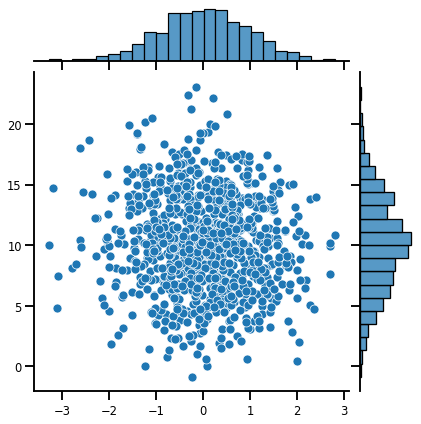

In [51]:
samples = mvn.sample(1000)
g = sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind='scatter')
plt.show()

### Gaussian Processes

A Gaussian Process is a Gaussian distribution over functions

In [59]:
# create a generic kernel from which to sample, in this case we use ExponentiatedQuadratic
kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
# create a vector with equally spaced sample points
xs = np.linspace(-5., 5., 200).reshape([-1, 1])
# create a Gaussian Process object which, when sampled, will provide
# points from a function that follows the gaussian process
gp = tfd.GaussianProcess(kernel, index_points=xs)
print("Batch shape:", gp.batch_shape)
print("Event shape:", gp.event_shape)

Batch shape: ()
Event shape: (200,)


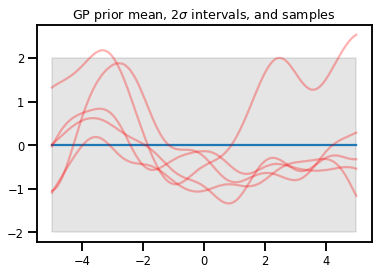

In [75]:
#Plot samples from the Gaussian Process with the mean and 2-sigma intervals
# mean and sigma are defined by the initial kernel (exponential quadratic)
upper, lower = gp.mean() + [2 * gp.stddev(), -2 * gp.stddev()]
plt.plot(xs, gp.mean()) # plot mean of kernel
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1) # plot 2 sigma region in grey
# sample the GP five times, meaning it returns five different functions that exhibit the kernel distribution
samples = []
for _ in range(5):
  sample = gp.sample()
  samples.append(sample)
  plt.plot(xs, sample, c='r', alpha=.3)
plt.title("GP prior mean, $2\sigma$ intervals, and samples")
plt.show()


### GP Regression

In [129]:
# Suppose we have some observed data
obs_x = [[-3.], [0.], [2.]]  # Shape 3x1 (3 1-D vectors)
obs_y = [3., -2., 2.]        # Shape 3   (3 scalars)

# we can tell our GP model to consider these points
gprm = tfd.GaussianProcessRegressionModel(kernel=kernel,index_points=xs, 
                                          observation_index_points=obs_x, 
                                          observations=obs_y
                                         )
print("Batch shape:", gp.batch_shape)
print("Event shape:", gp.event_shape)

Batch shape: ()
Event shape: (200,)


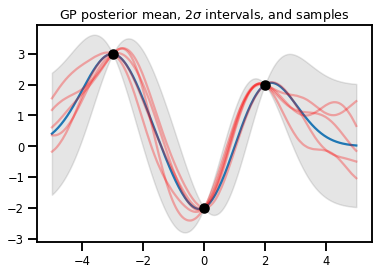

In [130]:
upper, lower = gprm.mean() + [2 * gprm.stddev(), -2 * gprm.stddev()]
plt.plot(xs, gprm.mean())
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)
for _ in range(5):
  plt.plot(xs, gprm.sample(), c='r', alpha=.3)
plt.scatter(obs_x, obs_y, c='k', zorder=3)
plt.title("GP posterior mean, $2\sigma$ intervals, and samples")
plt.show()